In [8]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = "C:/Windows/Fonts/HMKMRHD.ttf"
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

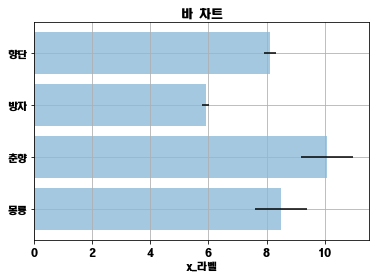

In [17]:
np.random.seed(3)
people = ['몽룡', '춘향', '방자', '향단']
y_pos = np.arange(len(people))
performance = 3 + 10 * np.random.rand(len(people))
error = np.random.rand(len(people))

plt.title('바 차트')
plt.barh(y_pos, performance, xerr = error, alpha = 0.4) # alpha는 투명도
plt.yticks(y_pos, people)
plt.xlabel('x_라벨')
plt.grid()
plt.show()

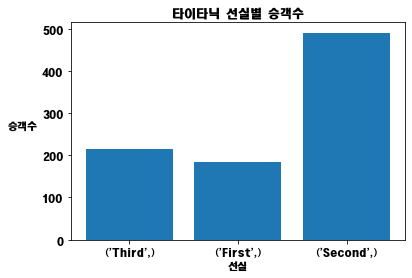

In [42]:
import seaborn as sns
titanic = sns.load_dataset('titanic')

df = titanic[['class', 'pclass']].groupby('class').count()
s = titanic[['class']].value_counts() # 동일 : titanic[['class', 'pclass']].groupby('class').count()

y = df.pclass.values
x = np.arange(len(y))
xlabel = s.index.to_list()
plt.title('타이타닉 선실별 승객수')
plt.bar(x, y)
plt.xticks(x, xlabel)
plt.xlabel('선실')
plt.ylabel('승객수', rotation = 0, labelpad = 20)
plt.show()

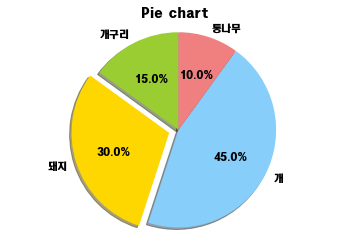

In [46]:
# 파이차트 : 카테고리별 값의 상대적인 비교를 해야할 때 사용
labels = ['개구리', '돼지', '개', '통나무']
sizes = [15, 30, 45, 10]
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode = (0, 0.1, 0, 0)
plt.title('Pie chart')
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()

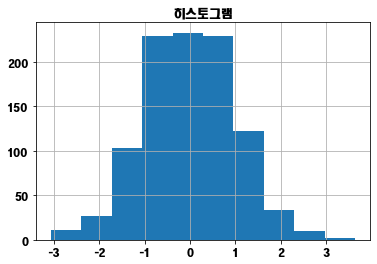

In [49]:
# 히스토그램
np.random.seed(2021)
x = np.random.randn(1000)
plt.title('히스토그램')
arrays, bins, patches = plt.hist(x, bins = 10)
plt.grid()
plt.show()

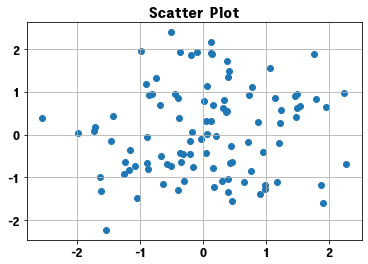

In [52]:
# 산점도(Scatter Plot) : 두 개의 실수 데이터 집합의 상관관계를 살펴볼 때 사용
np.random.seed(0)
X = np.random.normal(0, 1, 100)
Y = np.random.normal(0, 1, 100)
plt.title('Scatter Plot')
plt.scatter(X, Y)
plt.grid()
plt.show()

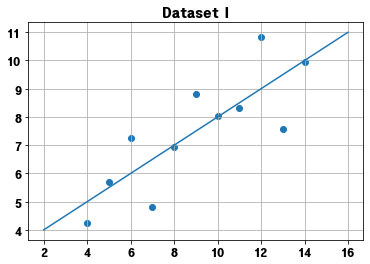

In [58]:
ans = sns.load_dataset('anscombe')
ans.head()
ans.groupby('dataset').describe()
ds1 = ans[ans.dataset == 'I']
ds1

plt.scatter(ds1.x, ds1.y)
plt.plot([2, 16], [4, 11])
plt.grid()
plt.title('Dataset I')
plt.show()

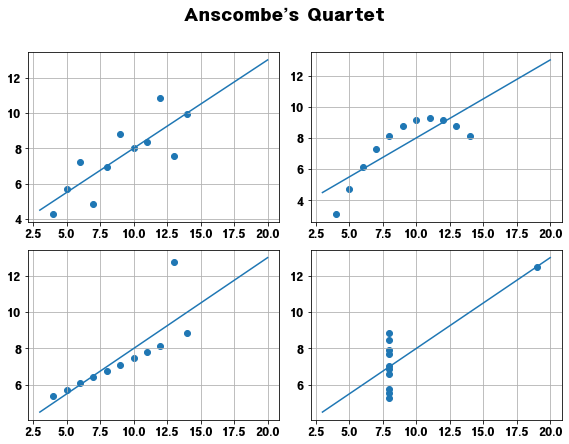

In [71]:
fig, axes = plt.subplots(2, 2, figsize = (8, 6))
for i, roman in enumerate(['I', 'II', 'III', 'IV']):
    ds = ans[ans.dataset == roman]
    ax = axes[i//2, i%2]
    ax.scatter(ds.x, ds.y)
    ax.plot([3, 20], [4.5, 13])
    ax.grid()

fig.suptitle('Anscombe\'s Quartet', fontsize = 16, y = 1.02)
plt.tight_layout()
plt.show()

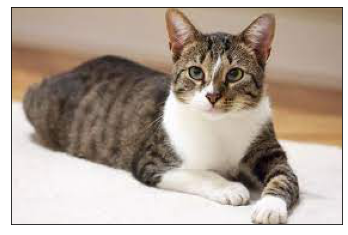

In [81]:
# Imshow
import matplotlib.image as img

image = img.imread('C:\\Users\\Bestc\\Pictures\\cat.jpg')
plt.imshow(image)
plt.xticks([]); plt.yticks([])
plt.show()

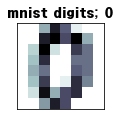

In [86]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.images[0]
digits.images.shape

plt.title('mnist digits; 0')
plt.imshow(X, interpolation = 'nearest', cmap = plt.cm.bone_r)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.subplots_adjust(left = 0.35, right = 0.65, bottom = 0.35, top = 0.65)
plt.show()

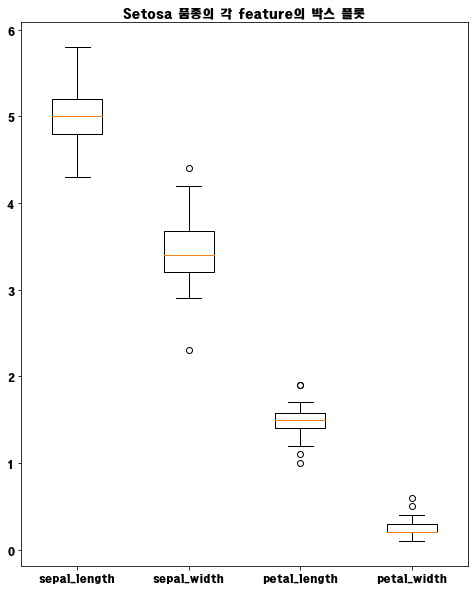

In [93]:
# box plot
iris = sns.load_dataset('iris')
iris.head()
setosa = iris[iris.species == 'setosa']
plt.figure(figsize = (8, 10))
plt.boxplot([setosa.sepal_length, setosa.sepal_width, setosa.petal_length, setosa.petal_width],
            labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
plt.title('Setosa 품종의 각 feature의 박스 플롯')
plt.show()

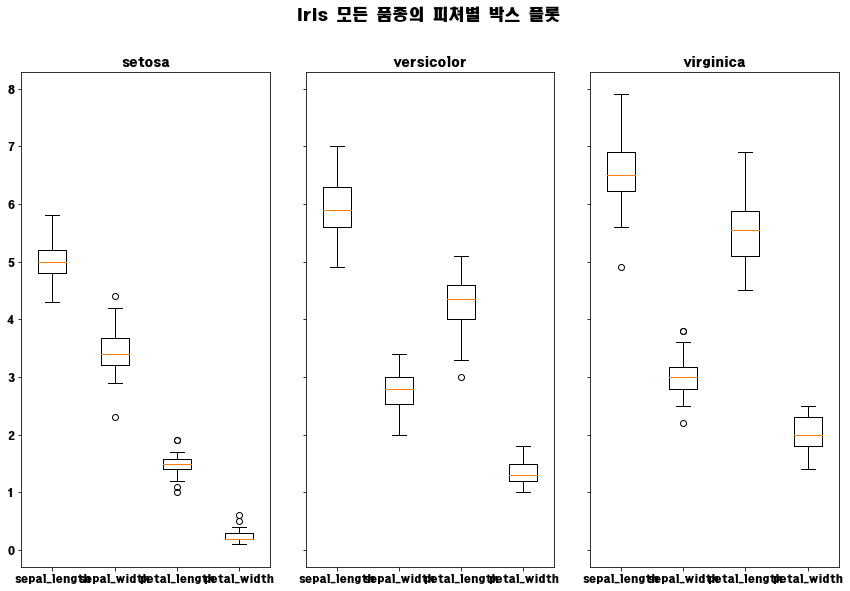

In [99]:
fig, axes = plt.subplots(1, 3, figsize = (12, 8), sharey = True)

for i, species in enumerate(iris.species.unique()):
    sub = iris[iris.species == species]
    ax = axes[i]
    ax.boxplot([sub.sepal_length, sub.sepal_width, sub.petal_length, sub.petal_width],
                labels = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
    ax.set_title(species)

fig.suptitle('Iris 모든 품종의 피쳐별 박스 플롯', fontsize = 16, y = 1.02)
plt.tight_layout()
plt.show()

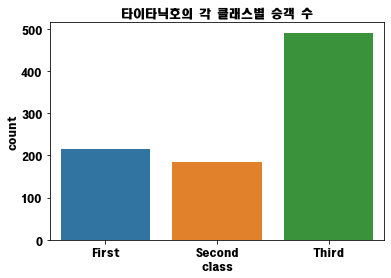

In [102]:
# 카운트 플롯 : 각 카테고리 값별로 데이터가 얼마나 있는지 표시할 수 있는 플롯
sns.countplot(x = 'class', data = titanic)
plt.title('타이타닉호의 각 클래스별 승객 수')
plt.show()

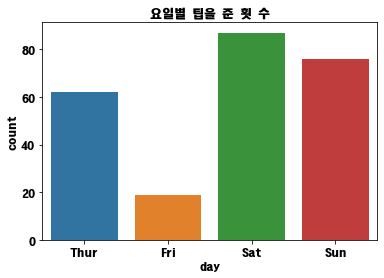

In [114]:
sns.countplot(x = 'day', data = tips)
plt.title('요일별 팁을 준 횟 수')
plt.show()

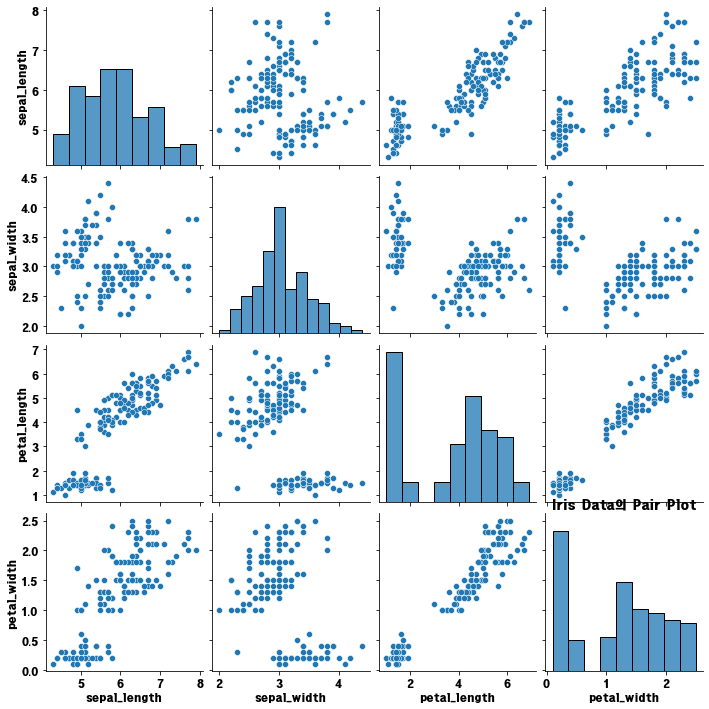

In [117]:
sns.pairplot(iris)
plt.title("Iris Data의 Pair Plot")
plt.show()

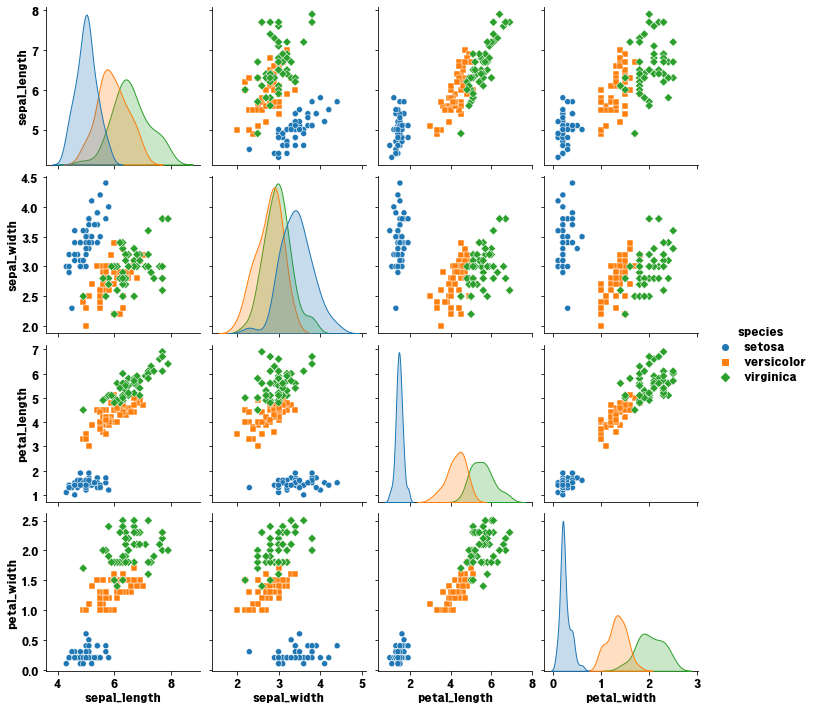

In [120]:
sns.pairplot(iris, hue = 'species', markers = ['o', 's', 'D']); # hue : 구분기준 / marker : 범주에 따른 표시방식 결정

Text(0.5, 1.0, 'Titanic호의 선실별 남녀 승객수')

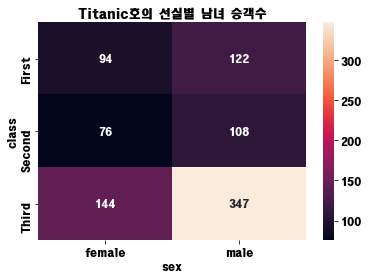

In [123]:
# heatmap()
tt = titanic.pivot_table(index = 'class', columns = 'sex', aggfunc = 'size')
sns.heatmap(tt, annot = True, fmt = 'd')
plt.title('Titanic호의 선실별 남녀 승객수')

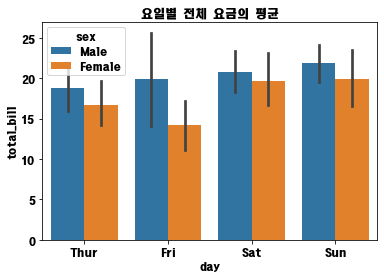

In [127]:
# 다차원 복합 데이터 / barplot()
tips.head()
sns.barplot(x = 'day', y = 'total_bill', hue = 'sex', data = tips)
plt.title('요일별 전체 요금의 평균')
plt.show()